## Merging data from different years (2016-2021)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# years = [i for i in [2018, 2021]]
years = [i for i in range(2016,2022)]

union = set()
intersection = None
for year in years:
    file_name = f'annual_data{year}.csv'
    with open(file_name, 'r') as f:
        for line in f.readlines():
            cols = set([s.strip('_').strip('\n').lower() if f'{year}' not in s else s.replace(f'{year}', '').strip('_').strip('\n').lower() for s in line.split(',') ])
            union = union.union(cols)
            if intersection is None:
                intersection = set(cols)

            intersection = intersection.intersection(cols)
            break

print(f'Union : {sorted(list(union))}')
print(f'Intersection : {sorted(list(intersection))}')
print(f'Difference : {sorted(list(union - intersection))}')


for year in years:
    file_name = f'annual_data{year}.csv'
    df = pd.read_csv(file_name, low_memory=False)
    if year == 2019:
        df.drop(columns = ['potassium_100g', 'potassium_text'], inplace=True)
    cols = df.columns.values
    col_dict = {}
    for col in cols:
        new_val = col.replace(f'{year}', '').strip('_').strip('\n').lower()
        if new_val in col_dict.values():
            print(f'Found repeated normalized col name for {year} : {col}, {new_val}')
            #repetition in 2019
            # Found repeated normalized col name for 2019 : potassium_text, potassium_text
            # Found repeated normalized col name for 2019 : potassium_100g, potassium_100g
        if col not in col_dict:
            col_dict[col] = new_val
        else:
            print(f'Found repeated col name for {year} : {col}')
    print(col_dict)
    df.rename(columns=col_dict, inplace=True)
    df.to_csv(f'annual_data_renamed{year}.csv', index=False)
    
# 16,17,18 match
# drop [combo_meal_2019, notes] from 2019
# drop ['combo_meal', 'f_id', 'matched', 'menu_scraper', 'menustat_2019_complete', 'name', 'new', 'notes', 'nutr_scraper'] from 2020
# drop ['combo_meal', 'f_id', 'iurl', 'matched_2020', 'menu_scraper', 'new_item', 'notes', 'nutr_scraper'] from 2021
# street_name_rdd.map(lambda x: ' '.join(str(x).strip().lower().translate(str.maketrans('', '', string.punctuation)).split()))

Union : ['calories', 'calories_100g', 'calories_text', 'carbohydrates', 'carbohydrates_100g', 'carbohydrates_text', 'cholesterol', 'cholesterol_100g', 'cholesterol_text', 'combo_meal', 'dietary_fiber', 'dietary_fiber_100g', 'dietary_fiber_text', 'f_id', 'food_category', 'item_description', 'item_name', 'iurl', 'kids_meal', 'limited_time_offer', 'matched', 'matched_2020', 'menu_item_id', 'menu_scraper', 'menustat_2019_complete', 'name', 'new', 'new_item', 'notes', 'nutr_scraper', 'potassium', 'potassium_100g', 'potassium_text', 'protein', 'protein_100g', 'protein_text', 'regional', 'restaurant', 'saturated_fat', 'saturated_fat_100g', 'saturated_fat_text', 'serving_size', 'serving_size_household', 'serving_size_text', 'serving_size_unit', 'shareable', 'sodium', 'sodium_100g', 'sodium_text', 'sugar', 'sugar_100g', 'sugar_text', 'total_fat', 'total_fat_100g', 'total_fat_text', 'trans_fat', 'trans_fat_100g', 'trans_fat_text', 'year']
Intersection : ['calories', 'calories_text', 'carbohydrat

In [ ]:
years = [i for i in range(2016,2022)]

union = set()
intersection = None
for year in years:
    file_name = f'annual_data_renamed{year}.csv'
    with open(file_name, 'r') as f:
        for line in f.readlines():
            cols = set([s.strip('_').strip('\n').lower() if f'{year}' not in s else s.replace(f'{year}', '').strip('_').strip('\n').lower() for s in line.split(',') ])
            union = union.union(cols)
            if intersection is None:
                intersection = set(cols)

            intersection = intersection.intersection(cols)
            break

print(f'Union : {sorted(list(union))}')
print(f'Intersection : {sorted(list(intersection))}')
print(f'Difference : {sorted(list(union - intersection))}')

combined_df = None
for year in [2016, 2017, 2018]:
    file_name = f'annual_data_renamed{year}.csv'
    df = pd.read_csv(file_name, low_memory=False)
    if combined_df is None:
        combined_df = pd.DataFrame(columns = df.columns)
    combined_df = combined_df.append(df, ignore_index=True, verify_integrity=False, sort=False)

Union : ['calories', 'calories_100g', 'calories_text', 'carbohydrates', 'carbohydrates_100g', 'carbohydrates_text', 'cholesterol', 'cholesterol_100g', 'cholesterol_text', 'combo_meal', 'dietary_fiber', 'dietary_fiber_100g', 'dietary_fiber_text', 'f_id', 'food_category', 'item_description', 'item_name', 'iurl', 'kids_meal', 'limited_time_offer', 'matched', 'matched_2020', 'menu_item_id', 'menu_scraper', 'menustat_2019_complete', 'name', 'new', 'new_item', 'notes', 'nutr_scraper', 'potassium', 'potassium_100g', 'potassium_text', 'protein', 'protein_100g', 'protein_text', 'regional', 'restaurant', 'saturated_fat', 'saturated_fat_100g', 'saturated_fat_text', 'serving_size', 'serving_size_household', 'serving_size_text', 'serving_size_unit', 'shareable', 'sodium', 'sodium_100g', 'sodium_text', 'sugar', 'sugar_100g', 'sugar_text', 'total_fat', 'total_fat_100g', 'total_fat_text', 'trans_fat', 'trans_fat_100g', 'trans_fat_text', 'year']
Intersection : ['calories', 'calories_text', 'carbohydrat

<ipython-input-3-3f30ec5e93ef>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True, verify_integrity=False, sort=False)
<ipython-input-3-3f30ec5e93ef>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True, verify_integrity=False, sort=False)
<ipython-input-3-3f30ec5e93ef>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True, verify_integrity=False, sort=False)


In [ ]:
null_stats = combined_df.isna().astype(int).describe()


In [ ]:
print(null_stats.loc['mean', :])
print((null_stats.loc['mean', :] > 0.7).astype(int).sum())

menu_item_id              0.000000
year                      0.000000
restaurant                0.000000
food_category             0.000000
item_name                 0.000000
item_description          0.000000
serving_size              0.593242
serving_size_text         0.999294
serving_size_unit         0.592646
serving_size_household    0.798668
calories                  0.148777
total_fat                 0.154749
saturated_fat             0.168992
trans_fat                 0.211288
cholesterol               0.187199
sodium                    0.154285
potassium                 0.983860
carbohydrates             0.162032
protein                   0.163938
sugar                     0.191436
dietary_fiber             0.180057
calories_100g             0.604257
total_fat_100g            0.606294
saturated_fat_100g        0.611257
trans_fat_100g            0.629324
cholesterol_100g          0.613719
sodium_100g               0.604701
potassium_100g            0.990982
carbohydrates_100g  

In [ ]:
# drop columns which contain at least 75% null values
drop_columns = []
for col in null_stats.columns:
    if null_stats.loc['mean', col] >= 0.75:
        print(col, null_stats.loc['mean', col])
        drop_columns.append(col)

combined_df.drop(columns = drop_columns, inplace=True)
combined_df.describe()

serving_size_text 0.9992938921672467
serving_size_household 0.7986684823725223
potassium 0.98386039239421
potassium_100g 0.9909819942502648
calories_text 0.9958743128057699
total_fat_text 0.9987088313915368
saturated_fat_text 0.9990316235436526
trans_fat_text 0.9997276441216523
cholesterol_text 0.9949563726231906
sodium_text 0.9982044686538558
potassium_text 0.9999596509809855
carbohydrates_text 0.9919201089423514
protein_text 0.9929994452009886
sugar_text 0.9917284511020326
dietary_fiber_text 0.9834367276945579


serving_size      calories     total_fat  saturated_fat     trans_fat  \
count  40324.000000  84386.000000  83794.000000   82382.000000  78189.000000   
mean      98.170296    379.440140     17.082318       6.409496      0.257796   
std      172.487879    410.751663     24.636638      11.916969      8.901421   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%       15.000000    130.000000      0.500000       0.000000      0.000000   
50%       24.000000    270.000000      9.000000       3.500000      0.000000   
75%      112.000000    500.000000     23.000000       9.000000      0.000000   
max     3983.500000  13960.000000    628.000000    2046.000000   1470.000000   

        cholesterol        sodium  carbohydrates       protein         sugar  \
count  80577.000000  83840.000000   83072.000000  82883.000000  80157.000000   
mean      55.649262    676.773301      43.176018     14.215756     22.465835   
std      104.896702   1048.590655      60.134484     22.084249     33.023137   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000     80.000000      12.000000      1.000000      2.000000   
50%       20.000000    300.000000      33.950000      7.000000      8.000000   
75%       65.000000    920.000000      60.000000     18.000000     32.000000   
max     2680.000000  41290.000000    3763.000000    679.000000    783.000000   

       ...  calories_100g  total_fat_100g  saturated_fat_100g  trans_fat_100g  \
count  ...   39232.000000    39030.000000        38538.000000    36747.000000   
mean   ...     142.874465        7.055393            2.546318        0.053610   
std    ...     149.295844       11.966084            4.880761        0.628051   
min    ...       0.000000        0.000000            0.000000        0.000000   
25%    ...      43.000000        0.000000            0.000000        0.000000   
50%    ...      88.000000        2.000000            1.000000        0.000000   
75%    ...     225.250000       11.000000            4.000000        0.000000   
max    ...    9030.000000      988.000000          572.000000       53.000000   

       cholesterol_100g    sodium_100g  carbohydrates_100g  protein_100g  \
count      38294.000000   39188.000000        38909.000000  38805.000000   
mean          18.807724     290.792819           15.563340      4.507409   
std           36.209009    1261.866499           19.591784      6.616299   
min            0.000000       0.000000            0.000000      0.000000   
25%            0.000000      12.000000            6.000000      0.000000   
50%            4.000000      64.000000           12.000000      2.000000   
75%           25.000000     474.000000           20.000000      7.000000   
max         1188.000000  209000.000000         1800.000000    425.000000   

         sugar_100g  dietary_fiber_100g  
count  38262.000000        38533.000000  
mean       7.922064            0.695534  
std       14.073167            2.583295  
min        0.000000            0.000000  
25%        1.000000            0.000000  
50%        5.000000            0.000000  
75%       11.000000            1.000000  
max     1800.000000          400.000000  

[8 rows x 21 columns]

In [ ]:
combined_df.isna().astype(int).describe().loc['mean', :]

menu_item_id          0.000000
year                  0.000000
restaurant            0.000000
food_category         0.000000
item_name             0.000000
item_description      0.000000
serving_size          0.593242
serving_size_unit     0.592646
calories              0.148777
total_fat             0.154749
saturated_fat         0.168992
trans_fat             0.211288
cholesterol           0.187199
sodium                0.154285
carbohydrates         0.162032
protein               0.163938
sugar                 0.191436
dietary_fiber         0.180057
calories_100g         0.604257
total_fat_100g        0.606294
saturated_fat_100g    0.611257
trans_fat_100g        0.629324
cholesterol_100g      0.613719
sodium_100g           0.604701
carbohydrates_100g    0.607515
protein_100g          0.608564
sugar_100g            0.614041
dietary_fiber_100g    0.611308
kids_meal             0.000000
limited_time_offer    0.000000
regional              0.000000
shareable             0.000000
Name: me

In [ ]:
combined_df.to_csv('merged_data_16_17_18.csv', index = False)

In [ ]:
!wc -l merged_data_16_17_18.csv
!wc -l annual_data2016.csv

99136 merged_data_16_17_18.csv
33916 annual_data2016.csv


In [ ]:
file_name = f'annual_data_renamed{2019}.csv'
df = pd.read_csv(file_name, low_memory=False)
print(df.describe())
df.isna().astype(int).describe().loc['mean', :]

          year   menu_item_id  serving_size      calories     total_fat  \
count  25870.0   25870.000000  11375.000000  24489.000000  24287.000000   
mean    2019.0  210687.126440    107.297319    388.085712     18.017993   
std        0.0  282415.913504    189.331809    428.060191     28.637200   
min     2019.0       7.000000      0.000000      0.000000      0.000000   
25%     2019.0   45161.250000     16.000000    130.000000      0.000000   
50%     2019.0  140531.500000     32.000000    270.000000      9.000000   
75%     2019.0  175417.750000    118.000000    520.000000     25.000000   
max     2019.0  924531.000000   3792.000000   9240.000000   1478.000000   

             sodium  saturated_fat     trans_fat   cholesterol    potassium  \
count  24391.000000   24258.000000  23126.000000  24131.000000   777.000000   
mean     710.972285       6.562866      0.463677     58.847748   174.030888   
std     1044.280423      10.177585     16.363571    110.608836   291.950368   
min     

year                      0.000000
menu_item_id              0.000000
restaurant                0.000000
food_category             0.000000
item_name                 0.000000
item_description          0.000000
serving_size              0.560302
serving_size_text         0.981484
serving_size_unit         0.560186
serving_size_household    0.726247
calories                  0.053382
total_fat                 0.061191
sodium                    0.057170
saturated_fat             0.062312
trans_fat                 0.106069
cholesterol               0.067221
potassium                 0.969965
carbohydrates             0.065636
protein                   0.066061
sugar                     0.064476
dietary_fiber             0.076111
calories_100g             0.632393
total_fat_100g            0.636451
saturated_fat_100g        0.636529
trans_fat_100g            0.669037
cholesterol_100g          0.638036
sodium_100g               0.633204
potassium_100g            0.991535
carbohydrates_100g  

In [ ]:
print(set(df.columns) - set(combined_df.columns) - set(drop_columns))
# df.drop(columns = drop_columns, inplace=True)
# df.isna().astype(int).describe().loc['mean', :]

{'notes', 'combo_meal'}


In [ ]:
df['notes'].isna().astype(int).describe()

count    25870.000000
mean         0.998454
std          0.039292
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: notes, dtype: float64

In [ ]:
null_stats_2019 = df.isna().astype(int).describe()
# drop columns which contain at least 75% null values
drop_columns_2019 = []
for col in null_stats_2019.columns:
    if null_stats_2019.loc['mean', col] >= 0.75:
        print(col, null_stats_2019.loc['mean', col])
        drop_columns_2019.append(col)

df.drop(columns = drop_columns_2019, inplace=True)
df.describe()

serving_size_text 0.9814843448009277
potassium 0.9699652106687282
potassium_100g 0.9915345960572092
calories_text 0.9908774642442985
total_fat_text 0.9988790104367994
saturated_fat_text 0.9991495941244685
trans_fat_text 0.9986857363741786
cholesterol_text 0.9953614224971009
sodium_text 0.9986084267491303
potassium_text 0.9973714727483571
carbohydrates_text 0.9889833784306146
protein_text 0.9927715500579822
sugar_text 0.9910707383069192
dietary_fiber_text 0.9647468109779668
combo_meal 0.8050251256281407
notes 0.9984538074990337


year   menu_item_id  serving_size      calories     total_fat  \
count  25870.0   25870.000000  11375.000000  24489.000000  24287.000000   
mean    2019.0  210687.126440    107.297319    388.085712     18.017993   
std        0.0  282415.913504    189.331809    428.060191     28.637200   
min     2019.0       7.000000      0.000000      0.000000      0.000000   
25%     2019.0   45161.250000     16.000000    130.000000      0.000000   
50%     2019.0  140531.500000     32.000000    270.000000      9.000000   
75%     2019.0  175417.750000    118.000000    520.000000     25.000000   
max     2019.0  924531.000000   3792.000000   9240.000000   1478.000000   

             sodium  saturated_fat     trans_fat   cholesterol  carbohydrates  \
count  24391.000000   24258.000000  23126.000000  24131.000000    24172.00000   
mean     710.972285       6.562866      0.463677     58.847748       42.40911   
std     1044.280423      10.177585     16.363571    110.608836       47.78559   
min        0.000000       0.000000      0.000000      0.000000        0.00000   
25%       65.000000       0.000000      0.000000      0.000000       10.00000   
50%      330.000000       3.000000      0.000000     20.000000       31.00000   
75%      990.000000       9.000000      0.000000     70.000000       59.00000   
max    24970.000000     241.000000   1710.000000   2680.000000     1041.00000   

       ...  cholesterol_100g    sodium_100g  carbohydrates_100g  protein_100g  \
count  ...       9364.000000    9489.000000         9352.000000   9341.000000   
mean   ...         21.406984     326.397829           14.896065      5.168504   
std    ...         41.782120    2220.327837           18.823568      8.408843   
min    ...          0.000000       0.000000            0.000000      0.000000   
25%    ...          0.000000       8.000000            4.000000      0.000000   
50%    ...          1.000000      97.000000           11.000000      2.000000   
75%    ...         30.000000     504.000000           19.000000      9.000000   
max    ...       1188.000000  209000.000000          667.000000    425.000000   

        sugar_100g  dietary_fiber_100g     kids_meal  limited_time_offer  \
count  9405.000000         9258.000000  22135.000000        22135.000000   
mean      6.853376            0.743249      0.074814            0.011340   
std      11.218001            4.601416      0.263096            0.105884   
min       0.000000            0.000000      0.000000            0.000000   
25%       0.000000            0.000000      0.000000            0.000000   
50%       3.000000            0.000000      0.000000            0.000000   
75%      10.000000            1.000000      0.000000            0.000000   
max     546.000000          400.000000      1.000000            1.000000   

           regional     shareable  
count  22134.000000  22023.000000  
mean       0.031490      0.031058  
std        0.174642      0.173480  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 27 columns]

In [ ]:
df.isna().astype(int).describe().loc['mean', :]

year                      0.000000
menu_item_id              0.000000
restaurant                0.000000
food_category             0.000000
item_name                 0.000000
item_description          0.000000
serving_size              0.560302
serving_size_unit         0.560186
serving_size_household    0.726247
calories                  0.053382
total_fat                 0.061191
sodium                    0.057170
saturated_fat             0.062312
trans_fat                 0.106069
cholesterol               0.067221
carbohydrates             0.065636
protein                   0.066061
sugar                     0.064476
dietary_fiber             0.076111
calories_100g             0.632393
total_fat_100g            0.636451
saturated_fat_100g        0.636529
trans_fat_100g            0.669037
cholesterol_100g          0.638036
sodium_100g               0.633204
carbohydrates_100g        0.638500
protein_100g              0.638925
sugar_100g                0.636451
dietary_fiber_100g  

In [ ]:
print(set(df.columns) - set(combined_df.columns))
print(set(combined_df.columns) - set(df.columns))

{'serving_size_household'}
set()


In [ ]:
df.drop(columns = 'serving_size_household', inplace=True)

In [ ]:
print(len(combined_df.index), len(df.index))
combined_df = pd.concat([combined_df, df], axis=0, join='outer', ignore_index=True, verify_integrity=False, sort=False, copy=True)
print(len(combined_df.index))
combined_df.to_csv('merged_data_16_17_18_19.csv', index = False)

99135 25870
125005


In [ ]:
combined_df.columns

Index(['menu_item_id', 'year', 'restaurant', 'food_category', 'item_name',
       'item_description', 'serving_size', 'serving_size_unit', 'calories',
       'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol', 'sodium',
       'carbohydrates', 'protein', 'sugar', 'dietary_fiber', 'calories_100g',
       'total_fat_100g', 'saturated_fat_100g', 'trans_fat_100g',
       'cholesterol_100g', 'sodium_100g', 'carbohydrates_100g', 'protein_100g',
       'sugar_100g', 'dietary_fiber_100g', 'kids_meal', 'limited_time_offer',
       'regional', 'shareable'],
      dtype='object')

In [ ]:
file_name = f'annual_data_renamed{2020}.csv'
df = pd.read_csv(file_name, low_memory=False)
print(df.describe())
df.isna().astype(int).describe().loc['mean', :]

          year   menu_item_id       matched           new  serving_size  \
count  38603.0   38603.000000  38602.000000  38603.000000  12469.000000   
mean    2020.0  562141.791881      0.499275      0.500712     74.214719   
std        0.0  415859.964933      0.500006      0.500006    140.656880   
min     2020.0       7.000000      0.000000      0.000000      0.000000   
25%     2020.0  132392.500000      0.000000      0.000000     12.000000   
50%     2020.0  924548.000000      0.000000      1.000000     22.000000   
75%     2020.0  934214.500000      1.000000      1.000000     71.000000   
max     2020.0  943868.000000      1.000000      1.000000   1519.000000   

           calories     total_fat  saturated_fat     trans_fat   cholesterol  \
count  32684.000000  31242.000000   31112.000000  29799.000000  30871.000000   
mean     392.015800     18.450085      18.791304      0.326916     54.365128   
std      478.829516     32.937795     162.127879      2.593115    104.337511   
min 

year                      0.000000
menu_item_id              0.000000
matched                   0.000026
new                       0.000000
restaurant                0.000000
food_category             0.000000
item_name                 0.000000
item_description          0.000000
serving_size              0.676994
serving_size_text         0.998005
serving_size_unit         0.688081
serving_size_household    0.825065
calories                  0.153330
total_fat                 0.190685
saturated_fat             0.194052
trans_fat                 0.228065
cholesterol               0.200295
sodium                    0.188224
potassium                 0.938968
carbohydrates             0.204621
protein                   0.203145
sugar                     0.201746
dietary_fiber             0.218947
calories_100g             0.894645
total_fat_100g            0.899645
saturated_fat_100g        0.899723
trans_fat_100g            0.900034
cholesterol_100g          0.899723
sodium_100g         

In [ ]:
print(set(df.columns) - set(combined_df.columns) - set(drop_columns))

{'matched', 'nutr_scraper', 'new', 'name', 'f_id', 'combo_meal', 'notes', 'menu_scraper', 'menustat_2019_complete'}


In [ ]:
df.loc[:, {'matched', 'menustat_2019_complete', 'combo_meal', 'nutr_scraper', 'notes', 'f_id', 'new', 'name', 'menu_scraper'}].isna().astype(int).describe()

<ipython-input-21-529d1300354b>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.loc[:, {'matched', 'menustat_2019_complete', 'combo_meal', 'nutr_scraper', 'notes', 'f_id', 'new', 'name', 'menu_scraper'}].isna().astype(int).describe()


matched  nutr_scraper      new          name          f_id  \
count  38603.000000  38603.000000  38603.0  38603.000000  38603.000000   
mean       0.000026      0.800275      0.0      0.800249      0.800275   
std        0.005090      0.399799      0.0      0.399819      0.399799   
min        0.000000      0.000000      0.0      0.000000      0.000000   
25%        0.000000      1.000000      0.0      1.000000      1.000000   
50%        0.000000      1.000000      0.0      1.000000      1.000000   
75%        0.000000      1.000000      0.0      1.000000      1.000000   
max        1.000000      1.000000      0.0      1.000000      1.000000   

         combo_meal         notes  menu_scraper  menustat_2019_complete  
count  38603.000000  38603.000000  38603.000000            38603.000000  
mean       0.905292      0.825324      0.941688                0.999948  
std        0.292815      0.379694      0.234335                0.007198  
min        0.000000      0.000000      0.000000                0.000000  
25%        1.000000      1.000000      1.000000                1.000000  
50%        1.000000      1.000000      1.000000                1.000000  
75%        1.000000      1.000000      1.000000                1.000000  
max        1.000000      1.000000      1.000000                1.000000

In [ ]:
df.drop(columns = ['matched', 'menustat_2019_complete', 'combo_meal', 'nutr_scraper', 'notes', 'f_id', 'new', 'name', 'menu_scraper'], inplace = True)

In [ ]:
null_stats_2020 = df.isna().astype(int).describe()
# drop columns which contain at least 75% null values
drop_columns_2020 = []
for col in null_stats_2020.columns:
    if null_stats_2020.loc['mean', col] >= 0.75:
        print(col, null_stats_2020.loc['mean', col])
        drop_columns_2020.append(col)

df.describe()

serving_size_text 0.9980053363728207
serving_size_household 0.825065409424138
potassium 0.9389684739528016
calories_100g 0.8946454938735331
total_fat_100g 0.8996451053026967
saturated_fat_100g 0.8997228194699893
trans_fat_100g 0.9000336761391602
cholesterol_100g 0.8997228194699893
sodium_100g 0.8982203455689972
potassium_100g 0.9992746677719349
carbohydrates_100g 0.8987384400176152
protein_100g 0.9004740564204855
sugar_100g 0.8987643447400461
dietary_fiber_100g 0.9010698650363962
calories_text 0.972774136725125
total_fat_text 0.9989379063803331
saturated_fat_text 0.9988601922130405
trans_fat_text 0.9990156205476258
cholesterol_text 0.9971245758101702
sodium_text 0.9982384788746989
potassium_text 0.9955702924643163
carbohydrates_text 0.9906224904800145
protein_text 0.994352770510064
sugar_text 0.994093723285755
dietary_fiber_text 0.9863223065564852


year   menu_item_id  serving_size      calories     total_fat  \
count  38603.0   38603.000000  12469.000000  32684.000000  31242.000000   
mean    2020.0  562141.791881     74.214719    392.015800     18.450085   
std        0.0  415859.964933    140.656880    478.829516     32.937795   
min     2020.0       7.000000      0.000000      0.000000      0.000000   
25%     2020.0  132392.500000     12.000000    110.000000      0.000000   
50%     2020.0  924548.000000     22.000000    250.000000      8.000000   
75%     2020.0  934214.500000     71.000000    520.000000     24.000000   
max     2020.0  943868.000000   1519.000000   9450.000000    850.000000   

       saturated_fat     trans_fat   cholesterol        sodium  carbohydrates  \
count   31112.000000  29799.000000  30871.000000  31337.000000   30704.000000   
mean       18.791304      0.326916     54.365128    675.728192      40.601135   
std       162.127879      2.593115    104.337511   1085.034445      47.832858   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%         0.000000      0.000000      0.000000     55.000000       8.000000   
50%         3.000000      0.000000     15.000000    267.000000      29.000000   
75%         9.000000      0.000000     65.000000    890.000000      57.000000   
max      7990.000000    370.000000   2750.000000  27530.000000    1180.000000   

       ...  sodium_100g  potassium_100g  carbohydrates_100g  protein_100g  \
count  ...  3929.000000       28.000000         3909.000000   3842.000000   
mean   ...   345.290914       36.250000           16.818112      5.353982   
std    ...   448.088235       75.200288           16.854575      6.830079   
min    ...     0.000000        0.000000            0.000000      0.000000   
25%    ...    13.000000        0.000000            5.000000      0.000000   
50%    ...   237.000000        2.000000           12.000000      3.000000   
75%    ...   541.000000       12.000000           22.000000      9.000000   
max    ...  8790.000000      222.000000          100.000000     92.000000   

        sugar_100g  dietary_fiber_100g     kids_meal  limited_time_offer  \
count  3908.000000         3819.000000  12397.000000        12398.000000   
mean      7.758444            0.753339      0.080181            0.007259   
std      11.489637            1.309158      0.271584            0.084895   
min       0.000000            0.000000      0.000000            0.000000   
25%       0.000000            0.000000      0.000000            0.000000   
50%       4.000000            0.000000      0.000000            0.000000   
75%      11.000000            1.000000      0.000000            0.000000   
max     158.000000           15.000000      1.000000            1.000000   

           regional     shareable  
count  12398.000000  14873.000000  
mean       0.020568      0.030122  
std        0.141938      0.170928  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 28 columns]

In [ ]:
print(set(df.columns) - set(combined_df.columns))
print(print(set(combined_df.columns) - set(df.columns)))
print(set(df.columns) - set(combined_df.columns) - set(drop_columns_2020))

{'protein_text', 'dietary_fiber_text', 'cholesterol_text', 'serving_size_household', 'serving_size_text', 'calories_text', 'carbohydrates_text', 'total_fat_text', 'potassium', 'sugar_text', 'potassium_text', 'trans_fat_text', 'potassium_100g', 'saturated_fat_text', 'sodium_text'}
set()
None
set()


In [ ]:
df.drop(columns = drop_columns_2020, inplace=True)
combined_df = pd.concat([combined_df, df], axis=0, join='outer', ignore_index=True, verify_integrity=False, sort=False, copy=True)
combined_df.to_csv('merged_data_16_20.csv', index = False)

In [ ]:
!wc -l merged_data_16_17_18_19.csv

125006 merged_data_16_17_18_19.csv


In [ ]:
file_name = f'annual_data_renamed{2021}.csv'
df = pd.read_csv(file_name, low_memory=False)
print(df.describe())
df.isna().astype(int).describe().loc['mean', :]

          year  matched_2020      new_item   menu_item_id  serving_size  \
count  29977.0  29976.000000  29976.000000   29975.000000  12945.000000   
mean    2021.0      0.745330      0.254670  607409.019550     75.405689   
std        0.0      0.435683      0.435683  414516.145977    171.107931   
min     2021.0      0.000000      0.000000       7.000000      0.000000   
25%     2021.0      0.000000      0.000000  150508.500000     11.000000   
50%     2021.0      1.000000      0.000000  928794.000000     20.000000   
75%     2021.0      1.000000      1.000000  944003.500000     71.000000   
max     2021.0      1.000000      1.000000  951497.000000   4961.000000   

           calories     total_fat  saturated_fat     trans_fat   cholesterol  \
count  29438.000000  29323.000000   29116.000000  27863.000000  28849.000000   
mean     388.582132     18.145226       6.847287      0.380673     59.857290   
std      523.957242     31.557838      24.809027      4.013639    134.923346   
min 

year                      0.000000
matched_2020              0.000033
new_item                  0.000033
menu_item_id              0.000067
food_category             0.000000
restaurant                0.000000
item_name                 0.000000
item_description          0.000000
serving_size              0.568169
serving_size_text         0.996264
serving_size_unit         0.599726
serving_size_household    0.827901
calories                  0.017980
total_fat                 0.021817
saturated_fat             0.028722
trans_fat                 0.070521
cholesterol               0.037629
sodium                    0.020549
potassium                 0.937319
carbohydrates             0.035727
protein                   0.035227
sugar                     0.040798
dietary_fiber             0.059712
calories_text             0.996164
total_fat_text            0.999333
saturated_fat_text        0.999400
trans_fat_text            0.999333
cholesterol_text          0.989058
sodium_text         

In [ ]:
print(set(df.columns) - set(combined_df.columns) - set(drop_columns))

{'nutr_scraper', 'iurl', 'new_item', 'f_id', 'combo_meal', 'notes', 'menu_scraper', 'matched_2020'}


In [ ]:
df.loc[:, {'combo_meal', 'iurl', 'matched_2020', 'nutr_scraper', 'notes', 'f_id', 'new_item', 'menu_scraper'}].isna().astype(int).describe()

<ipython-input-29-18cef157a749>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df.loc[:, {'combo_meal', 'iurl', 'matched_2020', 'nutr_scraper', 'notes', 'f_id', 'new_item', 'menu_scraper'}].isna().astype(int).describe()


nutr_scraper          iurl      new_item          f_id    combo_meal  \
count  29977.000000  29977.000000  29977.000000  29977.000000  29977.000000   
mean       0.062748      0.062748      0.000033      0.062748      0.921073   
std        0.242513      0.242513      0.005776      0.242513      0.269630   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      1.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              notes  menu_scraper  matched_2020  
count  29977.000000  29977.000000  29977.000000  
mean       0.954165      0.751576      0.000033  
std        0.209131      0.432106      0.005776  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000      0.000000  
50%        1.000000      1.000000      0.000000  
75%        1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000

In [ ]:
df.drop(columns = ['combo_meal', 'iurl', 'matched_2020', 'nutr_scraper', 'notes', 'f_id', 'new_item', 'menu_scraper'], inplace = True)

In [ ]:
null_stats_2021 = df.isna().astype(int).describe()
# drop columns which contain at least 75% null values
drop_columns_2021 = []
for col in null_stats_2021.columns:
    if null_stats_2021.loc['mean', col] >= 0.75:
        print(col, null_stats_2021.loc['mean', col])
        drop_columns_2021.append(col)


serving_size_text 0.9962638022483904
serving_size_household 0.8279013910664843
potassium 0.9373186109350502
calories_text 0.9961637255229009
total_fat_text 0.9993328218300698
saturated_fat_text 0.9993995396470627
trans_fat_text 0.9993328218300698
cholesterol_text 0.9890582780131434
sodium_text 0.9993661807385662
potassium_text 1.0
carbohydrates_text 0.9833539046602395
protein_text 0.9882910231177235
sugar_text 0.9864896420589119
dietary_fiber_text 0.9780164793007973


In [ ]:
print(set(df.columns) - set(combined_df.columns))
print(print(set(combined_df.columns) - set(df.columns)))
print(set(df.columns) - set(combined_df.columns) - set(drop_columns_2021))

{'protein_text', 'dietary_fiber_text', 'cholesterol_text', 'serving_size_household', 'serving_size_text', 'calories_text', 'carbohydrates_text', 'total_fat_text', 'potassium', 'sugar_text', 'potassium_text', 'trans_fat_text', 'saturated_fat_text', 'sodium_text'}
{'calories_100g', 'carbohydrates_100g', 'cholesterol_100g', 'dietary_fiber_100g', 'trans_fat_100g', 'sodium_100g', 'protein_100g', 'sugar_100g', 'total_fat_100g', 'saturated_fat_100g'}
None
set()


In [ ]:
combined_df.isna().astype(int).describe().loc['mean', :]

menu_item_id          0.000000
year                  0.000000
restaurant            0.000000
food_category         0.000000
item_name             0.000000
item_description      0.000000
serving_size          0.607794
serving_size_unit     0.610031
calories              0.134767
total_fat             0.148434
saturated_fat         0.158036
trans_fat             0.198609
cholesterol           0.171318
sodium                0.146937
carbohydrates         0.156838
protein               0.157712
sugar                 0.173793
dietary_fiber         0.172797
calories_100g         0.702081
total_fat_100g        0.703957
saturated_fat_100g    0.706976
trans_fat_100g        0.723064
cholesterol_100g      0.708706
sodium_100g           0.702478
carbohydrates_100g    0.705021
protein_100g          0.705723
sugar_100g            0.708651
dietary_fiber_100g    0.707893
kids_meal             0.183004
limited_time_offer    0.182998
regional              0.183004
shareable             0.168555
Name: me

In [ ]:
df.drop(columns = drop_columns_2021, inplace=True)
#keeping only the common columns
combined_df = pd.concat([combined_df, df], axis=0, join='inner', ignore_index=True, verify_integrity=False, sort=False, copy=True)
combined_df.to_csv('merged_data_16_21.csv', index = False)

In [ ]:
!wc -l merged_data_16_20.csv
!wc -l merged_data_16_21.csv
!wc -l annual_data_renamed2021.csv
!wc -l annual_data_renamed2020.csv
!wc -l annual_data_renamed2019.csv
!wc -l annual_data_renamed2018.csv
!wc -l annual_data_renamed2017.csv
!wc -l annual_data_renamed2016.csv

163609 merged_data_16_20.csv
193586 merged_data_16_21.csv
29993 annual_data_renamed2021.csv
38620 annual_data_renamed2020.csv
25871 annual_data_renamed2019.csv
30121 annual_data_renamed2018.csv
35100 annual_data_renamed2017.csv
33917 annual_data_renamed2016.csv


In [ ]:
combined_df.drop_duplicates()

menu_item_id  year  restaurant           food_category  \
0             10004  2016  Applebee's                    Soup   
1            100052  2016       Qdoba      Appetizers & Sides   
2            100054  2016       Qdoba                 Entrees   
3            100057  2016       Qdoba              Sandwiches   
4            100060  2016       Qdoba              Sandwiches   
...             ...   ...         ...                     ...   
193580     951493.0  2021     Zaxby's  Toppings & Ingredients   
193581     951494.0  2021     Zaxby's  Toppings & Ingredients   
193582     951495.0  2021     Zaxby's  Toppings & Ingredients   
193583     951496.0  2021     Zaxby's  Toppings & Ingredients   
193584     951497.0  2021     Zaxby's  Toppings & Ingredients   

                                                item_name  \
0       Tomato Basil Soup, for Pick 'n Pair & Lunch Co...   
1                           Lil' Chicken Nachos Kids Meal   
2                                            Burrito Bowl   
3                            Grilled Quesadilla Kids Meal   
4                                                 Burrito   
...                                                   ...   
193580                                            Nuclear   
193581                                             Insane   
193582                                           Original   
193583                                           Teriyaki   
193584                                                BBQ   

                                         item_description  serving_size  \
0       Tomato Basil Soup, for Pick 'n Pair & Lunch Co...           NaN   
1       Lil' Chicken Nachos Kids Meal w/ Handmade Tort...           NaN   
2                                            Burrito Bowl           NaN   
3       Grilled Quesadilla Kids Meal w/ Flour Tortilla...           NaN   
4                                                 Burrito           NaN   
...                                                   ...           ...   
193580           Nuclear, Sauces (8 oz Portion By Volume)           8.0   
193581            Insane, Sauces (8 oz Portion By Volume)           8.0   
193582          Original, Sauces (8 oz Portion By Volume)           8.0   
193583          Teriyaki, Sauces (8 oz Portion By Volume)           8.0   
193584               Bbq, Sauces (8 oz Portion By Volume)           8.0   

       serving_size_unit  calories  total_fat  ...  cholesterol  sodium  \
0                    NaN     240.0       15.0  ...         30.0  1090.0   
1                    NaN       NaN        NaN  ...          NaN     NaN   
2                    NaN       NaN        NaN  ...          NaN     NaN   
3                    NaN       NaN        NaN  ...          NaN     NaN   
4                    NaN       NaN        NaN  ...          NaN     NaN   
...                  ...       ...        ...  ...          ...     ...   
193580                oz     120.0        3.5  ...          4.0  5190.0   
193581                oz     150.0        3.5  ...          5.0  5650.0   
193582                oz     250.0       25.0  ...          0.0  4240.0   
193583                oz     470.0        3.0  ...          5.0  3530.0   
193584                oz     420.0        0.5  ...          0.0  2850.0   

        carbohydrates  protein  sugar  dietary_fiber  kids_meal  \
0                20.0      6.0   12.0            3.0          0   
1                 NaN      NaN    NaN            NaN          1   
2                 NaN      NaN    NaN            NaN          0   
3                 NaN      NaN    NaN            NaN          1   
4                 NaN      NaN    NaN            NaN          0   
...               ...      ...    ...            ...        ...   
193580           19.0      4.0    7.0            5.0        NaN   
193581           24.0      4.0   14.0            8.0        NaN   
193582            5.0      1.0    2.0            3.0        NaN   
193583          102.0

## Data cleaning
 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

^C
^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").config("spark.driver.memory", "12g").appName("big_data").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

import string, unicodedata
from pyspark.sql import functions as F

In [ ]:
df = spark.read.option('escape', '"') \
    .csv('merged_data_16_21.csv', header=True, sep=",")
df.show(5)

AnalysisException: ignored

In [ ]:
def fingerprint(value):
    key = unicodedata.normalize('NFKD', value).encode('ascii','ignore').decode()
    key = set(key.strip().lower().translate(str.maketrans('','',string.punctuation)).split())
    key = ' '.join(sorted(list(key)))
    return (key, value)


In [ ]:
df = df.withColumn('food_category', F.when(df['food_category']=='Desserts ', 'Desserts').otherwise(df['food_category']))
df = df.withColumn('food_category', F.when(df['food_category']=='Beverages ', 'Beverages').otherwise(df['food_category']))

In [ ]:
df.groupby('restaurant').count().orderBy('count', ascending = False)

In [ ]:
print(df.select('restaurant').distinct().count())
df.select('restaurant').distinct().orderBy('restaurant', ascending = False).collect()

In [ ]:
restaurant_rdd = df.select('restaurant').rdd.flatMap(list)
print(restaurant_rdd.take(5))
duplicates = restaurant_rdd.distinct(). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

In [ ]:
# [('hooters', ['Hooters', "Hooter's"]),
#  ('caesars little', ['Little Caesars', "Little Caesar's"]),
#  ('longhorn steakhouse', ['LongHorn Steakhouse', 'Longhorn Steakhouse']),
#  ('border on the', ['On the Border', 'On The Border']),
#  ('logans roadhouse', ['Logans Roadhouse', "Logan's Roadhouse"]),
#  ('dominos', ['Dominos', "Domino's"]),
#  ('starbucks', ['Starbucks', 'Starbucks ']),
#  ('house yard', ['Yard House', 'Yard House '])]

for t in duplicates:
    df = df.withColumn('restaurant', F.when(df['restaurant']==t[1][1], t[1][0]).otherwise(df['restaurant']))



In [ ]:
restaurant_rdd = df.select('restaurant').rdd.flatMap(list)
print(restaurant_rdd.take(5))
duplicates = restaurant_rdd.distinct(). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

In [ ]:
category_rdd = df.select('food_category').rdd.flatMap(list)
print(category_rdd.take(5))
duplicates = category_rdd.distinct().filter(lambda x : x is not None). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

# [('appetizers sides', ['Appetizers & Sides', 'Appetizers & sides'])]

for t in duplicates:
    df = df.withColumn('food_category', F.when(df['food_category']==t[1][1], t[1][0]).otherwise(df['food_category']))


category_rdd = df.select('food_category').rdd.flatMap(list)
print(category_rdd.take(5))
duplicates = category_rdd.distinct().filter(lambda x : x is not None). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

In [ ]:
# !ls
# !rm -rf /content/merge_data_cleaned*
df.write.csv(os.path.join('/content', 'merged_data_cleaned.csv'), header = True)

In [ ]:
df = spark.read.csv(os.path.join('/content', 'merged_data_cleaned.csv'), header=True, sep=",")
df.show(5)

In [ ]:
def fingerprint_lenient(value):
    key = unicodedata.normalize('NFKD', value).encode('ascii','ignore').decode()
    key = list(key.strip().lower().translate(str.maketrans('','',string.punctuation)).split())
    key = ' '.join(sorted(list(key)))
    return (key, value)

item_rdd = df.select('item_name').rdd.flatMap(list)
print(item_rdd.take(5))
duplicates = item_rdd.distinct().filter(lambda x : x is not None). \
	map(fingerprint_lenient). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

# Over 5000 items

replacements = {}
for t in duplicates:
    n = len(t[1])
    for i in range(1, n):
        replacements[t[1][i]] = t[1][0]


In [ ]:
df_cleaned = df.replace(replacements, subset = 'item_name')

In [ ]:
df_cleaned.show(5)

In [ ]:
item_rdd = df_cleaned.select('item_name').rdd.flatMap(list)
duplicates = item_rdd.distinct().filter(lambda x : x is not None). \
	map(fingerprint_lenient). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

In [ ]:
df_cleaned.write.csv(os.path.join('/content', 'data_merged_cleaned.csv'), header = True)

In [ ]:
df_cleaned = spark.read.csv(os.path.join('/content', 'data_merged_cleaned.csv'), header=True, sep=",")

In [ ]:
df_cleaned.groupby('year').count().orderBy('year', ascending = True)

In [ ]:
# filter out the row with erroneous year
df_cleaned = df_cleaned.filter(df_cleaned['year'] != 16)
df_cleaned.groupby('year').count().orderBy('year', ascending = True)

In [ ]:
df_cleaned.select('serving_size').distinct()

In [ ]:
#Ensure that only numeric chars are present in serving_size
df_cleaned.filter(df_cleaned['serving_size'].rlike('.*[A-Za-z].*'))

In [ ]:
df_cleaned.select('serving_size_unit').distinct().show(42)

In [ ]:
ssu_rdd = df_cleaned.select('serving_size_unit').rdd.flatMap(list)
print(ssu_rdd.take(5))
duplicates = ssu_rdd.distinct().filter(lambda x : x is not None). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

# [('g', ['g', 'g*', 'G']), ('fl oz', ['fl oz', 'fl  oz', 'fl oz*', 'fl oz.']), ('ml', ['ml', 'mL']), ('lb', ['lb', 'Lb']), ('tbsp', ['Tbsp', 'tbsp'])]

for t in duplicates:
    n = len(t[1])
    for i in range(1, n):
        df_cleaned = df_cleaned.withColumn('serving_size_unit', F.when(df_cleaned['serving_size_unit']==t[1][i], t[1][0]).otherwise(df_cleaned['serving_size_unit']))

ssu_rdd = df_cleaned.select('serving_size_unit').rdd.flatMap(list)
print(ssu_rdd.take(5))
duplicates = ssu_rdd.distinct().filter(lambda x : x is not None). \
	map(fingerprint). \
	groupByKey(). \
	filter(lambda x: len(x[1])>1). \
	mapValues(list). \
	collect()

print(duplicates)

In [ ]:
df_cleaned.select('serving_size_unit').groupBy('serving_size_unit').count().orderBy('count').show(34)

In [ ]:
# 8 - null
# Link - correct
# stick - null
# Lobster Tails - correct
# grapes - correct
# Egg - 
# 2 Pancakes - 2, Pancakes
# Draft - null
# Spear - correct
# Floret - correct
# Each - null
# Large - null
# Tub - correct
# oz cup - oz

check_vals = ['fl loz', 'floz', 'L']

# Tbs ==Tbsp
# cup = cups
# fl loz == fl oz == floz
# slice == slices

# need to be examined
df_cleaned.filter(df_cleaned['serving_size_unit'].isin(check_vals)).show()

In [ ]:
replacements = {}
replacements['8'] = ''
replacements['stick'] = ''
replacements['Draft'] = ''
replacements['Each'] = ''
replacements['Large'] = ''
replacements['Slices'] = 'slice'
replacements['oz cup'] = 'oz'
replacements['cups'] = 'cup'
replacements['Tbs'] = 'Tbsp'
replacements['fl loz'] = 'fl oz'
replacements['floz'] = 'fl oz'
replacements['2 Pancakes'] = 'Pancakes'
#replace 8 with null
#replace stick with null
#replace Draft with null
#replace Each with null
#replace Large with null
#replace Slices with slice
#replace oz cup with oz
#replace cups with cup
#replace Tbs with Tbsp
#replace fl loz with fl oz
#replace floz with fl oz
#replace 2 Pancakes with 2, Pancakes
df_cleaned = df_cleaned.withColumn('serving_size', F.when(df_cleaned['serving_size_unit']== '2 Pancakes', 2).otherwise(df_cleaned['serving_size']))
df_cleaned = df_cleaned.replace(replacements, subset = 'serving_size_unit')


In [ ]:
df_cleaned = df_cleaned.withColumn('serving_size_unit', F.when(df_cleaned['serving_size_unit']== '', None).otherwise(df_cleaned['serving_size_unit']))
df_cleaned.select('serving_size_unit').groupBy('serving_size_unit').count().orderBy('count').show(34)

In [ ]:
# calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,protein,sugar,dietary_fiber,kids_meal,limited_time_offer,regional,shareable
#Ensure that only numeric chars are present in the above cols
df_cleaned.filter(df_cleaned['calories'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['total_fat'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['saturated_fat'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['trans_fat'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['cholesterol'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['sodium'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['carbohydrates'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['protein'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['sugar'].rlike('.*[A-Za-z].*')).show()
df_cleaned.filter(df_cleaned['dietary_fiber'].rlike('.*[A-Za-z].*')).show()

In [ ]:
# calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,protein,sugar,dietary_fiber,kids_meal,limited_time_offer,regional,shareable
print(df_cleaned.select('calories').describe())
print(df_cleaned.select('total_fat').describe())
print(df_cleaned.select('saturated_fat').describe())#
print(df_cleaned.select('trans_fat').describe())#
print(df_cleaned.select('cholesterol').describe())#
print(df_cleaned.select('sodium').describe())#
print(df_cleaned.select('carbohydrates').describe())#
print(df_cleaned.select('protein').describe())
print(df_cleaned.select('sugar').describe())
print(df_cleaned.select('dietary_fiber').describe())#
print(df_cleaned.select('kids_meal').describe())
print(df_cleaned.select('limited_time_offer').describe())
print(df_cleaned.select('regional').describe())
print(df_cleaned.select('shareable').describe())


In [ ]:
#checking for outliers
# calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,protein,sugar,dietary_fiber,kids_meal,limited_time_offer,regional,shareable
import matplotlib.pyplot as plt

print('calories')
plt.hist(df_cleaned.select('calories').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('total_fat')
plt.hist(df_cleaned.select('total_fat').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('saturated_fat')
plt.hist(df_cleaned.select('saturated_fat').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('trans_fat')
plt.hist(df_cleaned.select('trans_fat').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('cholesterol')
plt.hist(df_cleaned.select('cholesterol').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('carbohydrates')
plt.hist(df_cleaned.select('carbohydrates').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('protein')
plt.hist(df_cleaned.select('protein').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('sugar')
plt.hist(df_cleaned.select('sugar').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('dietary_fiber')
plt.hist(df_cleaned.select('dietary_fiber').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('kids_meal')
plt.hist(df_cleaned.select('kids_meal').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('limited_time_offer')
plt.hist(df_cleaned.select('limited_time_offer').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('regional')
plt.hist(df_cleaned.select('regional').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

print('shareable')
plt.hist(df_cleaned.select('shareable').rdd.flatMap(list).filter(lambda x : x is not None).map(lambda x : float(x) if x is not None else None).collect(), bins=40)
plt.show()

In [ ]:
df_cleaned.groupby('food_category').count().orderBy('count', ascending = False)

In [ ]:
df_cleaned.groupby(['year', 'food_category']).count().orderBy(['year', 'count'], ascending = False).show(100)

In [ ]:
df_cleaned.select('food_category').distinct().collect()

In [ ]:
df_cleaned.groupby('food_category').count().orderBy('count', ascending = False).collect()

In [ ]:
df_cleaned.write.csv(os.path.join('/content', 'data_merged_cleaned_final.csv'), header = True)

## Exploratory Data Analysis

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").config("spark.driver.memory", "12g").appName("big_data").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import string, unicodedata
from pyspark.sql import functions as F

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px


In [ ]:
df = spark.read.csv('data_merged_cleaned_final.csv', header=True, sep=",", inferSchema = True)
df.show(1)

+------------+----+----------+-------------+--------------------+--------------------+------------+-----------------+--------+---------+-------------+---------+-----------+------+-------------+-------+-----+-------------+---------+------------------+--------+---------+
|menu_item_id|year|restaurant|food_category|           item_name|    item_description|serving_size|serving_size_unit|calories|total_fat|saturated_fat|trans_fat|cholesterol|sodium|carbohydrates|protein|sugar|dietary_fiber|kids_meal|limited_time_offer|regional|shareable|
+------------+----+----------+-------------+--------------------+--------------------+------------+-----------------+--------+---------+-------------+---------+-----------+------+-------------+-------+-----+-------------+---------+------------------+--------+---------+
|     10004.0|2016|Applebee's|         Soup|Tomato Basil Soup...|Tomato Basil Soup...|        null|             null|   240.0|     15.0|          7.0|      0.0|       30.0|1090.0|         20

Generating wordclouds to visually search for new trends :

In [ ]:
years = range(2016, 2022)
df1 = df.groupBy(['year', 'restaurant']).count()

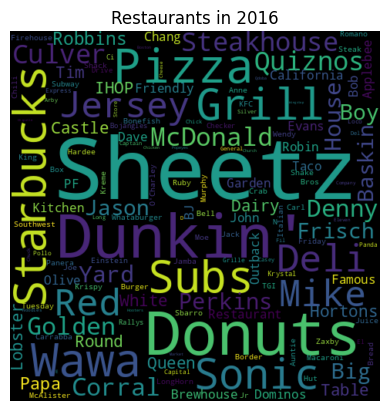

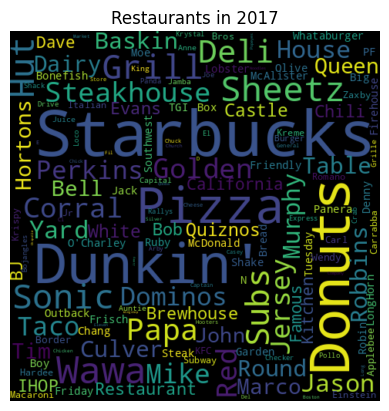

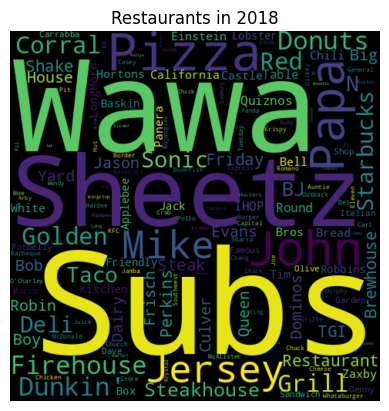

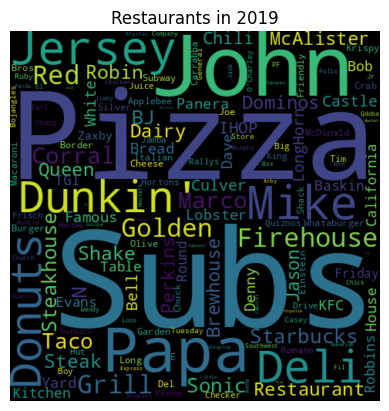

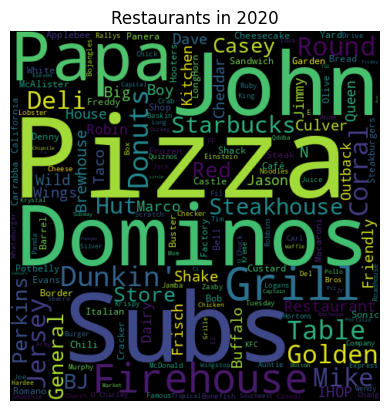

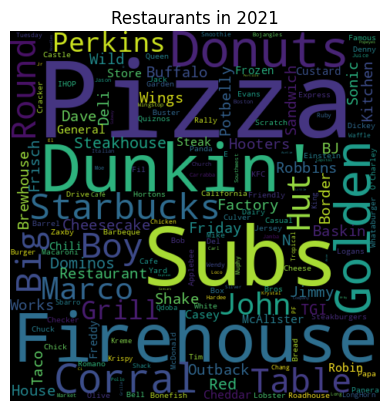

In [ ]:
years = range(2016, 2022)
for year in years:
    df_year = df1.filter(df1['year'] == year)
    rs_counts = df_year.rdd.map(lambda x : [x['restaurant']] * (int(x['count'] / 20))).collect()
    year_words = []
    # break
    for val in rs_counts:
        year_words.extend(val)

    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0, collocations=False, stopwords = STOPWORDS).generate(' '.join(year_words))

    # Display the generated image:
    plt.title(f'Restaurants in {year}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


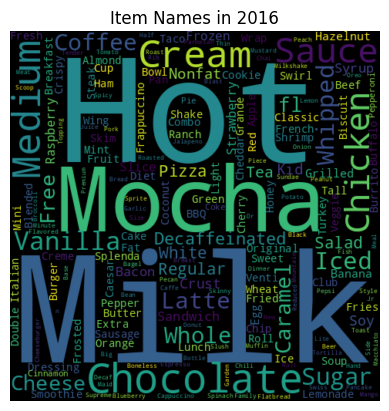

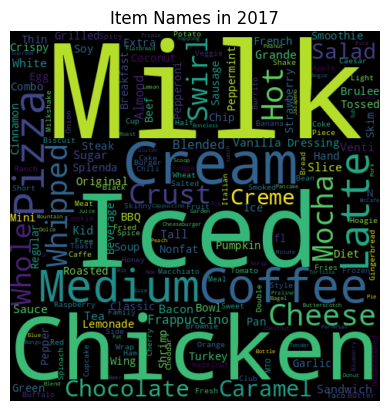

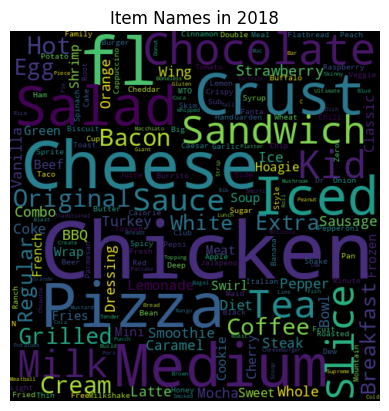

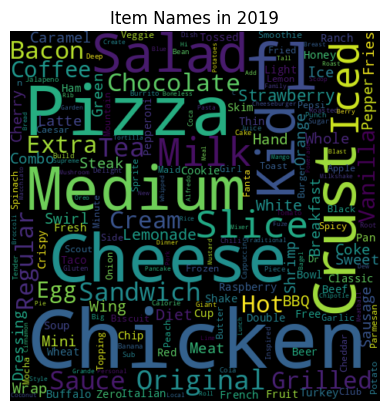

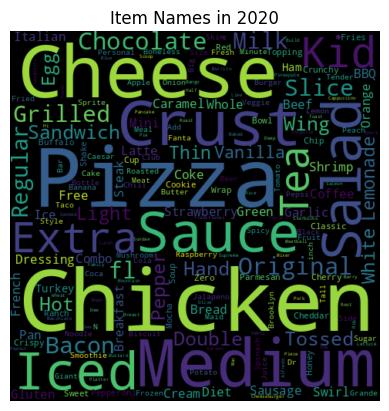

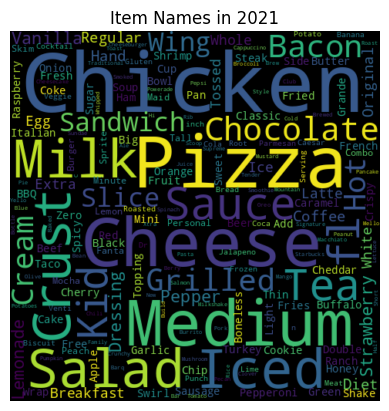

In [ ]:
STOPWORDS.add('W')
STOPWORDS.add('Large')
STOPWORDS.add('Small')
STOPWORDS.add('oz')
for year in years:
    df_year = df.filter(df['year'] == year)
    item_name_words = df_year.select('item_name').rdd.flatMap(list).collect()
    year_words = []
    # break
    for item in item_name_words:
        year_words.extend(item.split())

    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0, collocations=False, stopwords=STOPWORDS).generate(' '.join(year_words))

    # Display the generated image:
    plt.title(f'Item Names in {year}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


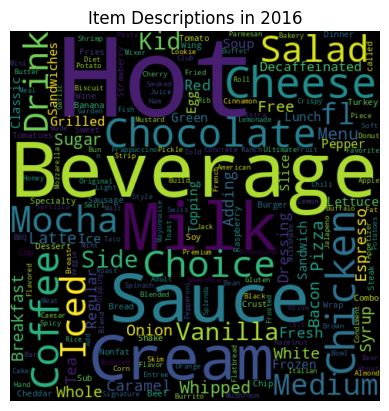

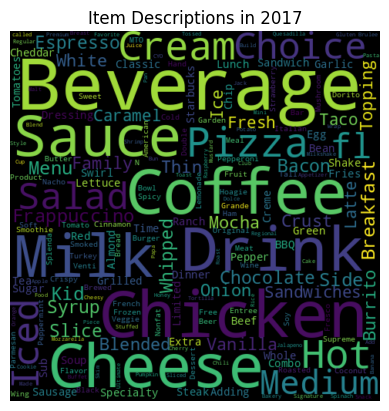

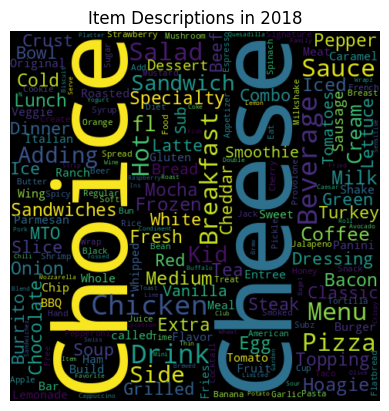

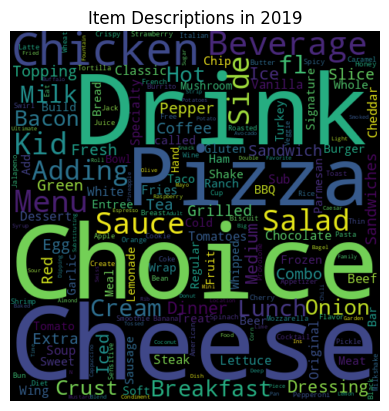

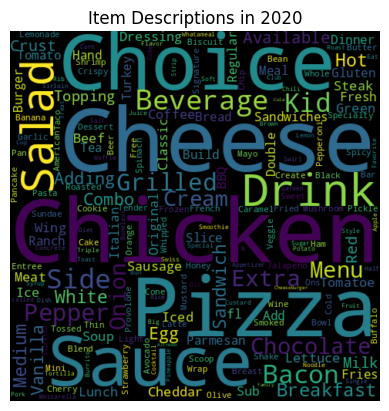

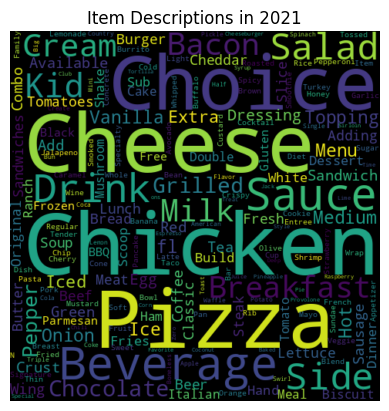

In [ ]:
for year in years:
    df_year = df.filter(df['year'] == year)
    item_name_words = df_year.select('item_description').rdd.flatMap(list).collect()
    year_words = []
    # break
    for item in item_name_words:
        year_words.extend(item.split())

    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0, collocations=False, stopwords=STOPWORDS).generate(' '.join(year_words))

    # Display the generated image:
    plt.title(f'Item Descriptions in {year}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


Plotting the frequencies using parallel coordinates

In [ ]:
def plot_parallel_coordinates(df1, sample_id_col = 'restaurant', variable_name = 'count'):
    # df has rows <year, sample_id_col, variable>
    restr_counts = {}

    for year in years:
        df2_rows = df1.filter(df1['year'] == year).collect()
        
        for row in df2_rows:
            if row[sample_id_col] not in restr_counts.keys():
                temp = {}
                for year1 in years:
                    temp[str(year1)] = 0
                restr_counts[row[sample_id_col]] = temp
            
            restr_counts[row[sample_id_col]][str(year)] = row[variable_name]

    custom_df = pd.DataFrame.from_dict(restr_counts, orient='index')
    custom_df[sample_id_col] = custom_df.index
    custom_df.reset_index(inplace = True)
    # custom_df should now contain rows <sample_id_col, 2016 var, 2017 var, ... , 2021 var>

    dimensions = []
    for year in years:
        dimensions.append(dict(range = [0,custom_df[str(year)].max()],
                    label = year, values = custom_df[str(year)]))
    fig = go.Figure(data=
        go.Parcoords(

            line = dict(color = custom_df[sample_id_col].astype('category').cat.codes,
                    colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
            dimensions = dimensions,
            ids = custom_df[sample_id_col]
        )
    )

    fig.update_layout(
        plot_bgcolor = 'white',
        paper_bgcolor = 'white',
        showlegend = True
    )

    fig.show()

def plot_parallel_coordinates_px(df1, sample_id_col = 'restaurant', variable_name = 'count'):
    # df has rows <year, sample_id_col, variable>
    restr_counts = {}

    for year in years:
        df2_rows = df1.filter(df1['year'] == year).collect()
        
        for row in df2_rows:
            if row[sample_id_col] not in restr_counts.keys():
                temp = {}
                for year1 in years:
                    temp[str(year1)] = 0
                restr_counts[row[sample_id_col]] = temp
            
            restr_counts[row[sample_id_col]][str(year)] = row[variable_name]

    custom_df = pd.DataFrame.from_dict(restr_counts, orient='index')
    custom_df[sample_id_col] = custom_df.index
    custom_df[sample_id_col] = custom_df[sample_id_col].astype('category')
    custom_df.reset_index(inplace = True)
    # custom_df should now contain rows <sample_id_col, 2016 var, 2017 var, ... , 2021 var>
    
    inv_color_map = dict( zip( custom_df[sample_id_col].cat.codes, custom_df[sample_id_col]) )
    tickvals = sorted(inv_color_map.keys())
    ticktexts = [inv_color_map[x] for x in tickvals]

    fig = px.parallel_coordinates(custom_df, color=custom_df[sample_id_col].cat.codes, labels=[str(year) for year in years],
                             color_continuous_scale=px.colors.diverging.Spectral, title = variable_name)
    fig.update_layout(coloraxis_colorbar=dict(
        title=sample_id_col,
        tickvals=tickvals,
        ticktext=ticktexts,
    ))
    fig.show()

In [ ]:
df1 = df.groupBy(['year', 'restaurant']).count()
restr_counts = {}

for year in years:
    df2_rows = df1.filter(df1['year'] == year).collect()
    
    for row in df2_rows:
        if row['restaurant'] not in restr_counts.keys():
            temp = {}
            for year1 in years:
                temp[str(year1)] = 0
            restr_counts[row['restaurant']] = temp
        
        restr_counts[row['restaurant']][str(year)] = row['count']

custom_df = pd.DataFrame.from_dict(restr_counts, orient='index')
custom_df['restaurant'] = custom_df.index
custom_df.reset_index(inplace = True)

In [ ]:
custom_df.head(5)

index  2016  2017  2018  2019  2020  2021      restaurant
0      Carl's Jr.   202   223   191   175   184   108      Carl's Jr.
1  Firehouse Subs   300   283   873   830  1126  1101  Firehouse Subs
2          Arby's   131   152   126   127   177    68          Arby's
3   Boston Market    98   101   101    83   124   138   Boston Market
4            IHOP   412   404   407   388   613   355            IHOP

In [ ]:
dimensions = []
for year in years:
    dimensions.append(dict(range = [0,custom_df[str(year)].max()],
                label = year, values = custom_df[str(year)]))
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = custom_df['restaurant'].astype('category').cat.codes,
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = dimensions,
        ids = custom_df['restaurant']
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
df1 = df.groupBy(['year', 'restaurant']).count()
plot_parallel_coordinates_px(df1, 'restaurant', 'count')

In [ ]:
df1 = df.groupBy(['year', 'food_category']).count()
plot_parallel_coordinates_px(df1, 'food_category', 'count')

In [ ]:
df1 = df.groupBy(['year', 'food_category']).count()
df2 = df1.filter((df1['food_category']  != 'Beverages') & (df1['food_category']  != 'Toppings & Ingredients'))
df2.show()
plot_parallel_coordinates_px(df2, 'food_category', 'count')

+----+------------------+-----+
|year|     food_category|count|
+----+------------------+-----+
|2016|        Sandwiches| 3055|
|2020|          Desserts| 1810|
|2020|           Entrees| 5295|
|2020|    Fried Potatoes|  395|
|2020|             Pizza| 2076|
|2021|Appetizers & Sides| 2351|
|2016|            Salads|  876|
|2019|Appetizers & Sides| 1943|
|2021|        Sandwiches| 2323|
|2021|          Desserts| 1574|
|2019|    Fried Potatoes|  335|
|2019|           Burgers|  710|
|2016|    Fried Potatoes|  355|
|2020|           Burgers|  895|
|2019|              Soup|  521|
|2020|        Sandwiches| 3490|
|2018|          Desserts| 1427|
|2018|Appetizers & Sides| 2086|
|2021|    Fried Potatoes|  343|
|2016|           Burgers|  773|
+----+------------------+-----+
only showing top 20 rows



In [ ]:
df1 = df.select(['year', 'sugar'])
df1.groupBy('year').avg().orderBy('year')


+----+---------+------------------+
|year|avg(year)|        avg(sugar)|
+----+---------+------------------+
|2016|   2016.0| 23.56224891631769|
|2017|   2017.0|22.379175683212488|
|2018|   2018.0|21.409157450076805|
|2019|   2019.0|21.329683497231635|
|2020|   2020.0|20.719755963005024|
|2021|   2021.0|20.430439591013428|
+----+---------+------------------+

In [ ]:
df1 = df.select(['year', 'food_category', 'sugar'])
df2 = df1.groupBy(['year', 'food_category']).avg('sugar').orderBy(['year', 'food_category'])
df2.show(5)
plot_parallel_coordinates_px(df2, 'food_category', 'avg(sugar)')

+----+------------------+------------------+
|year|     food_category|        avg(sugar)|
+----+------------------+------------------+
|2016|Appetizers & Sides| 8.491535326086957|
|2016|       Baked Goods|15.189746543778801|
|2016|         Beverages|42.437569792751034|
|2016|           Burgers|11.903614457831326|
|2016|          Desserts| 48.14378698224852|
+----+------------------+------------------+
only showing top 5 rows



In [ ]:
nutrition_cols = ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber']
col_subset = list(set(['year', 'food_category']).union(set(nutrition_cols)))
df1 = df.select(col_subset)
df2 = df1.groupBy(['year', 'food_category']).avg('calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber').orderBy(['year', 'food_category'])

for nutrition_col in nutrition_cols:
    plot_parallel_coordinates_px(df2, 'food_category', f'avg({nutrition_col})')

In [ ]:
# Calculating variance
nutrition_cols = ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber']
col_subset = list(set(['year', 'food_category']).union(set(nutrition_cols)))
df1 = df.select(col_subset)
df2 = df1.groupBy(['year', 'food_category']).agg(
    F.round(F.var_samp("calories"), 2).alias("var_samp_calories"),
    F.round(F.var_samp("total_fat"), 2).alias("var_samp_total_fat"),
    F.round(F.var_samp("saturated_fat"), 2).alias("var_samp_saturated_fat"),
    F.round(F.var_samp("trans_fat"), 2).alias("var_samp_trans_fat"),
    F.round(F.var_samp("cholesterol"), 2).alias("var_samp_cholesterol"),
    F.round(F.var_samp("sodium"), 2).alias("var_samp_sodium"),
    F.round(F.var_samp("carbohydrates"), 2).alias("var_samp_carbohydrates"),
    F.round(F.var_samp("protein"), 2).alias("var_samp_protein"),
    F.round(F.var_samp("sugar"), 2).alias("var_samp_sugar"),
    F.round(F.var_samp("dietary_fiber"), 2).alias("var_samp_dietary_fiber")
).orderBy(['year', 'food_category'])
df2.show()

+----+--------------------+-----------------+------------------+----------------------+------------------+--------------------+---------------+----------------------+----------------+--------------+----------------------+
|year|       food_category|var_samp_calories|var_samp_total_fat|var_samp_saturated_fat|var_samp_trans_fat|var_samp_cholesterol|var_samp_sodium|var_samp_carbohydrates|var_samp_protein|var_samp_sugar|var_samp_dietary_fiber|
+----+--------------------+-----------------+------------------+----------------------+------------------+--------------------+---------------+----------------------+----------------+--------------+----------------------+
|2016|  Appetizers & Sides|        481902.72|           1918.95|                149.02|              0.33|            31818.81|     5516242.33|               4182.91|         1855.33|        229.68|                 23.14|
|2016|         Baked Goods|         35504.57|             101.0|                 20.78|              0.19|      

In [ ]:
# Calculating variance
nutrition_cols = ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber']
col_subset = list(set(['year', 'food_category']).union(set(nutrition_cols)))
df1 = df.select(col_subset)
p_df1 = df1.toPandas()
nutrition_cols = ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber']
X = p_df1.loc[:, ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber']]
p_df1.head(5)

year  carbohydrates  calories       food_category  total_fat  \
0  2016           20.0     240.0                Soup       15.0   
1  2016            NaN       NaN  Appetizers & Sides        NaN   
2  2016            NaN       NaN             Entrees        NaN   
3  2016            NaN       NaN          Sandwiches        NaN   
4  2016            NaN       NaN          Sandwiches        NaN   

   saturated_fat  trans_fat  protein  cholesterol  dietary_fiber  sodium  \
0            7.0        0.0      6.0         30.0            3.0  1090.0   
1            NaN        NaN      NaN          NaN            NaN     NaN   
2            NaN        NaN      NaN          NaN            NaN     NaN   
3            NaN        NaN      NaN          NaN            NaN     NaN   
4            NaN        NaN      NaN          NaN            NaN     NaN   

   sugar  
0   12.0  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
p_df1.loc[:, ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber']] = X_scaled

In [ ]:
p_df1.head()

year  carbohydrates  calories       food_category  total_fat  \
0  2016       0.005315  0.017192                Soup   0.010149   
1  2016            NaN       NaN  Appetizers & Sides        NaN   
2  2016            NaN       NaN             Entrees        NaN   
3  2016            NaN       NaN          Sandwiches        NaN   
4  2016            NaN       NaN          Sandwiches        NaN   

   saturated_fat  trans_fat   protein  cholesterol  dietary_fiber  sodium  \
0       0.000876        0.0  0.004528     0.005545       0.002855  0.0109   
1            NaN        NaN       NaN          NaN            NaN     NaN   
2            NaN        NaN       NaN          NaN            NaN     NaN   
3            NaN        NaN       NaN          NaN            NaN     NaN   
4            NaN        NaN       NaN          NaN            NaN     NaN   

     sugar  
0  0.01106  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [ ]:
df1_scaled = sparkDF=spark.createDataFrame(p_df1)
df1_scaled.show(5)

/content/spark-3.1.1-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


+----+--------------------+--------------------+------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|year|       carbohydrates|            calories|     food_category|           total_fat|       saturated_fat|trans_fat|             protein|         cholesterol|       dietary_fiber|              sodium|               sugar|
+----+--------------------+--------------------+------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2016|0.005314908317831517|0.017191977077363897|              Soup|0.010148849797023005|8.760951188986233E-4|      0.0|0.004528301886792452|0.005545286506469501|0.002855103497501...|0.010900000000000002|0.011059907834101382|
|2016|                 NaN|                 NaN|Appetizers & Sides|                 NaN|            

In [ ]:
df1_scaled = df1_scaled.replace(float('nan'), None)
df1_scaled.show(5)

+----+--------------------+--------------------+------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|year|       carbohydrates|            calories|     food_category|           total_fat|       saturated_fat|trans_fat|             protein|         cholesterol|       dietary_fiber|              sodium|               sugar|
+----+--------------------+--------------------+------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2016|0.005314908317831517|0.017191977077363897|              Soup|0.010148849797023005|8.760951188986233E-4|      0.0|0.004528301886792452|0.005545286506469501|0.002855103497501...|0.010900000000000002|0.011059907834101382|
|2016|                null|                null|Appetizers & Sides|                null|            

In [ ]:
df1_scaled.schema

StructType(List(StructField(year,LongType,true),StructField(carbohydrates,DoubleType,true),StructField(calories,DoubleType,true),StructField(food_category,StringType,true),StructField(total_fat,DoubleType,true),StructField(saturated_fat,DoubleType,true),StructField(trans_fat,DoubleType,true),StructField(protein,DoubleType,true),StructField(cholesterol,DoubleType,true),StructField(dietary_fiber,DoubleType,true),StructField(sodium,DoubleType,true),StructField(sugar,DoubleType,true)))

In [ ]:
df2 = df1_scaled.groupBy(['year', 'food_category']).avg('calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber').orderBy(['year', 'food_category'])

for nutrition_col in nutrition_cols:
    plot_parallel_coordinates_px(df2, 'food_category', f'avg({nutrition_col})')

In [ ]:
df1_scaled.groupBy(['year', 'food_category']).avg('calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','protein','sugar','dietary_fiber').orderBy(['year', 'food_category'])

+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|year|       food_category|       avg(calories)|      avg(total_fat)|  avg(saturated_fat)|      avg(trans_fat)|    avg(cholesterol)|         avg(sodium)|  avg(carbohydrates)|        avg(protein)|          avg(sugar)|  avg(dietary_fiber)|
+----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|2016|  Appetizers & Sides|0.035902240436797656| 0.01997400613889267|0.001007505655175...|1.183815394341710...|0.016395033534371033|0.013328539719626172|0.009968110550092986| 0.01666369650932263|0.007826299839711458|0.003162608844451633|
|2016|         Baked Goods| 0.02334085602118491|0.008692257909766892|6.204570274845851E-4|5.759451014030997E-5|0.002767916677217...|0.004433845982142857|0.012377887012175287|0.004829682723727221|0.013999766399796115|0.002027513702383...|
|2016|           Beverages| 0.01911152262685497|0.004135757275866935| 4.48367267513882E-4|2.399803093079546E-5|  0.0031763171263751|0.001366308824899...|0.012678491573824073|0.003944060064963907|0.039112967550922896|0.001178154975029...|
|2016|             Burgers| 0.05446036294173828|  0.0299384813201493|0.002009985307721606|7.376180472756877E-4|0.021169912367536542|0.014117181688125873|0.013883747071454984| 0.02628315460838877|0.010971073233024266|0.002900477745563...|
|2016|            Desserts| 0.03781564431316093| 0.01738525066022521|0.001720152621895685|2.650385140531213...|0.013921192112543274|0.002915858033573146|0.017917063733198384|0.006000428336576002|0.044372153900689826|0.002104255998983...|
|2016|             Entrees| 0.04946215286685143|0.024705262168788503|0.001472535822839...|2.901557009686526E-4| 0.03143979030253652| 0.01549625108091413|0.014867731705326867|0.026656325536909855| 0.01132651276815795|0.003598007150277...|
|2016|      Fried Potatoes|0.034973357462423936| 0.01882680879013051|8.300895997672928E-4|1.816438201613357...|0.002364526544841...|0.008601311764705886|0.013673981631235246|0.005895078663008788|0.001582979232748...|0.004277571975930713|
|2016|               Pizza|0.026423446475923342|0.010881081490407571|8.700604108276262E-4|3.211906393034085E-5|0.007161572646883535|0.008573305442729494|0.010657897426573033|0.012567442144470885|0.004472471501333...|0.002123803784294379|
|2016|              Salads| 0.03388470392768385| 0.02007627014392916|9.633905619163227E-4|8.076127963190859E-5|0.016526367887841807|0.010395848258706474|0.007551131233669449|0.019134653697410076|0.009323653809734224|0.004330506638825864|
|2016|          Sandwiches| 0.04480934375936299|0.020628227354312207|0.001267698568789...|1.277227580042959...|0.020189920052270747|  0.0163014120490889|  0.0149914499731778|0.023723312697641424|0.006921896244924002|0.003910091174767368|
|2016|                Soup|0.020666013075435606|0.009788172337317845|8.359094903445561E-4|2.063776676159336...|0.008193820966464215|0.012511101145038173|0.007437291393630475|0.008636568687121845|0.004677419354838726|0.002938924304205265|
|2016|Toppings & Ingred...|0.009091880135126492|0.004594212768237931|2.764754479063186...|3.742636725572863E-5|0.002924328794778006|0.002721199788583...|0.003365185439744338|0.003268288717452...|0.006828484296519...|0.001092818132896...|
|2017|  Appetizers & Sides|0.037549681440957494| 0.02083671381170407|0.001023344457587...|1.355251971403889...|0.016916538811625952|0.013529367160087725|0.010541134771183772|0.018155711343637533|0.008047029077117561| 0.00319483938852539|
|2017|         Baked Goods| 0.02251645909576631|0.008348635020775656|5.962889004514081E-4|5.081925243215563E-5|0.002690410150239...| 0.00431131810154525|0.011986866427437124|0.0047422578963827

In [ ]:
df1_scaled.agg(F.max(df1_scaled.sugar)).show()

+----------+
|max(sugar)|
+----------+
|       1.0|
+----------+

